<h2 align="center"> Лабораторна робота №6</h2>
<h3 align="center">Застосування numpy</h3>
<p align="center">ФБ-23 Ткачук Андрій</p>

<b>Мета роботи:</b> отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
noise=np.random.normal(0,0.5,100000)


Початкове значення k: 0.7
Початкове значення b: -10


Значення k, отримане за допомогою Методу найменших квадратів: 0.70059
Значення b, отримане за допомогою Методу найменших квадратів: -10.00663


Значення k, отримане за допомогою np.polyfit(x,y,1): 0.70059
Значення b, отримане за допомогою np.polyfit(x,y,1): -10.00663


Значення k, отримане за допомогою градієнтного спуску: 0.70059
Значення b, отримане за допомогою градієнтного спуску: -10.00663



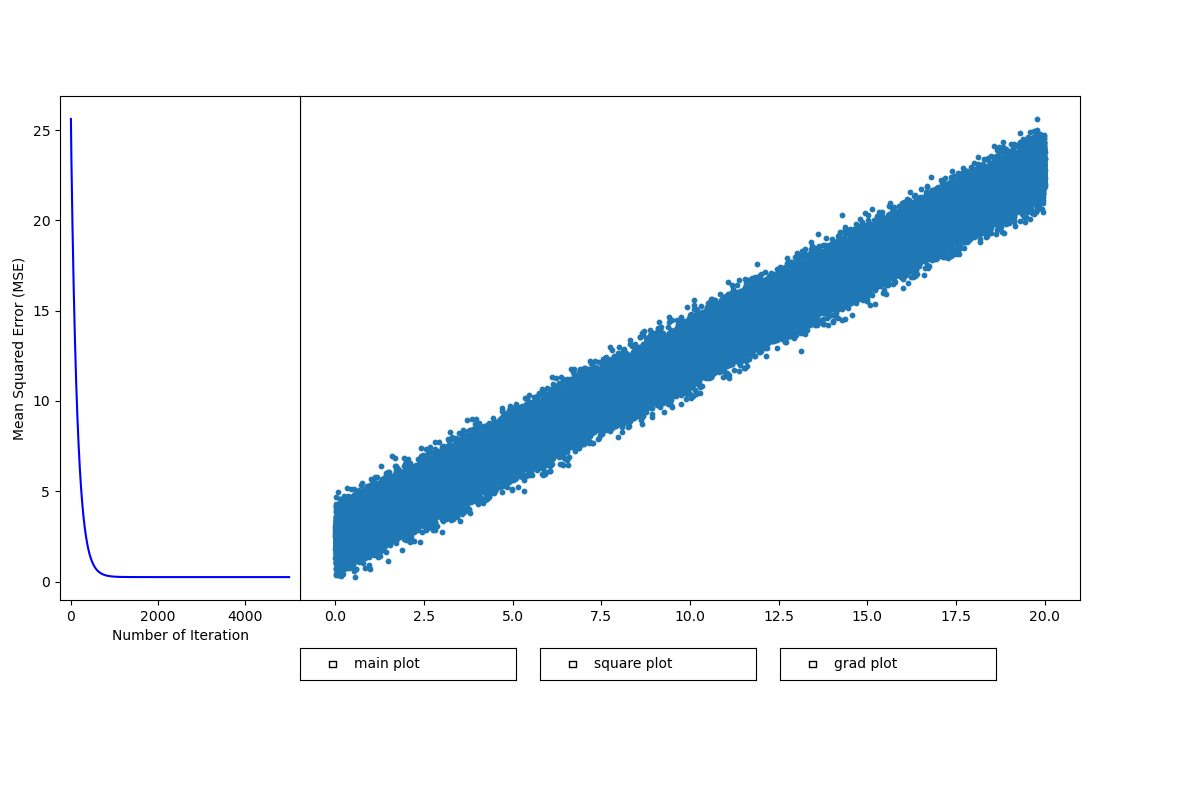

In [3]:

#*#########
#*Початкові значення
#*#########
x=np.linspace(0,20,len(noise))

start_k=0.7
start_b=-10
y=start_k*x+start_b
noise_y=y+noise
print(f'''
Початкове значення k: {start_k}
Початкове значення b: {start_b}
''')

#*#########
#*Обчислення методом найменших квадратів
#*#########
new_k=(np.sum((x-np.mean(x))*(noise_y-np.mean(noise_y))))/(np.sum((x-np.mean(x))**2))
new_b=np.mean(noise_y)-new_k*np.mean(x)
print(f'''
Значення k, отримане за допомогою Методу найменших квадратів: {round(new_k,5)}
Значення b, отримане за допомогою Методу найменших квадратів: {round(new_b,5)}
''')
new_y=new_k*x+new_b


#*#########
#*Використання np.polyfit(x,y,1)
#*#########
p=np.polyfit(x,noise_y,1)
print(f'''
Значення k, отримане за допомогою np.polyfit(x,y,1): {round(p[0],5)}
Значення b, отримане за допомогою np.polyfit(x,y,1): {round(p[1],5)}
''')

#*#########
#*Градієнтний спуску
#*#########
def gradient_descent(x,y,b0,b1,learning_rate,n_iter):
    errors=[]
    for _ in range(n_iter):
        y_pred=b0+b1*x
        
        b0_derivative=-2*np.mean(y-y_pred)
        b1_derivative=-2*np.mean(x*(y-y_pred))
        

        b0=b0-learning_rate*b0_derivative
        b1=b1-learning_rate*b1_derivative
        # error=np.mean((b1*x+b0-y)**2) формула з методички, однак оскільки y_pred=b1*x+b0, отримуємо:
        error=np.mean((y_pred-y)**2)
        errors.append(error)
    return b0,b1,errors

g_b0,g_b1,errors=gradient_descent(x,noise_y,0,0,0.007,5000)
gradient_y=g_b1*x+g_b0
# print(errors)
print(f'''
Значення k, отримане за допомогою градієнтного спуску: {round(g_b1,5)}
Значення b, отримане за допомогою градієнтного спуску: {round(g_b0,5)}
''')

#*#########
#*Графік та чекбокси
#*#########
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(x,noise_y, s=10)
fig.subplots_adjust(left=0.25, bottom=0.25)

#Початкова пряма
axmain = fig.add_axes([0.25, 0.15, 0.18, 0.04])
main_checkbox = CheckButtons(
    axmain,
    ['main plot']
)
def mainplot(x,y,mp_status:bool):
    for l in ax.lines:
        if l.get_color() == 'red':
            l.remove()
    if not mp_status:
        return
    ax.plot(x,y,color='red', label='main line')


#Пряма з методу найменших квадратів
axsquare = fig.add_axes([0.45, 0.15, 0.18, 0.04])
square_checkbox = CheckButtons(
    axsquare,
    ['square plot']
)
def squareplot(x,y,sp_status:bool):
    for l in ax.lines:
        if l.get_color() == 'black':
            l.remove()
    if not sp_status:
        return
    ax.plot(x,y,color='black',label='square line')


#Пряма з методу градієнтного спуску
axgrad = fig.add_axes([0.65, 0.15, 0.18, 0.04])
grad_checkbox = CheckButtons(
    axgrad,
    ['grad plot']
)
def gradplot(x,y,gp_status:bool):
    for l in ax.lines:
        if l.get_color() == 'green':
            l.remove()
    if not gp_status:
        return
    ax.plot(x,y,color='green',label='gradient line')

def update(val):
    mainplot(x,y,main_checkbox.get_status()[0])
    squareplot(x,new_y,square_checkbox.get_status()[0])
    gradplot(x,gradient_y,grad_checkbox.get_status()[0])

main_checkbox.on_clicked(update)
square_checkbox.on_clicked(update)
grad_checkbox.on_clicked(update)



ax_error = fig.add_axes([0.05, 0.25, 0.2, 0.63])
error_line, = ax_error.plot(errors, color='blue')
ax_error.set_xlabel('Number of Iteration')
ax_error.set_ylabel('Mean Squared Error (MSE)')
plt.show()

